In [1]:
# Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split
from sklearn.metrics import precision_score, roc_auc_score, recall_score,classification_report, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
import warnings
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
warnings.filterwarnings('ignore')
import time
from contextlib import contextmanager
@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

In [2]:
#chargement du dataste
data = pd.read_csv('../mlg-ulb-dataset/creditcard.csv')

In [3]:
display(data.head())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#standardisation (loi normale) de Amount et du time
stdScaler=StandardScaler()
data['Amount']=stdScaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['Time']=stdScaler.fit_transform(data['Time'].values.reshape(-1,1))

In [6]:
# definire X et Y
y = np.array(data.Class.tolist())
data = data.drop('Class', 1)
X = np.array(data.to_numpy())

In [7]:
# Train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [8]:
import collections
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(227845, 30)

(56962, 30)

(227845,)

(56962,)

In [9]:
# le nombre de transaction frauduleuse :1 et no frauduleuse : 0
collections.Counter(y_train)

Counter({0: 227451, 1: 394})

In [10]:
#  le nombre de transaction frauduleuse :1 et no frauduleuse : 0 
collections.Counter(y_test)

Counter({1: 98, 0: 56864})

In [11]:
# le nombre de transaction frauduleuse :1 et no frauduleuse : 0
collections.Counter(y)

Counter({0: 284315, 1: 492})

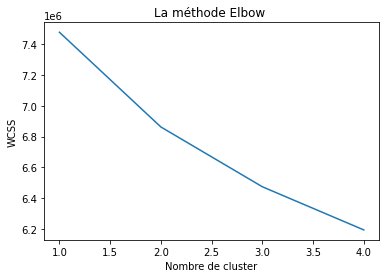

In [13]:
# on exécute l'analyse en utilisant 5 clusters 
# on enregistre le wss score pour l'utiliser pour tracer le graphe
# wcss=within-cluster-sum of squared
from sklearn.cluster import KMeans
wcss = []
for i in range(1,5):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',random_state = 0)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,5),wcss)
plt.title('La méthode Elbow ')#
plt.xlabel('Nombre de cluster')
plt.ylabel('WCSS')
plt.show()



In [11]:
# résultat avec la " méthode silhouette"
from sklearn.metrics import silhouette_score
print("les résultats avec la méthode silhouette \n")
for i in range(2,10):
    labels=KMeans(n_clusters = i,init = 'k-means++',random_state = 42).fit(X_train).labels_
    print("le score pour un nombre de cluster k = "+str(i)+" est "+str(silhouette_score(X_train,labels,metric='euclidean',random_state=200)))

les résultats avec la méthode silhouette 

le score pour un nombre de cluster k = 2 est 0.10474011217195232
le score pour un nombre de cluster k = 3 est 0.10690266938469849
le score pour un nombre de cluster k = 4 est 0.10839196421789152
le score pour un nombre de cluster k = 5 est 0.06084188409683676
le score pour un nombre de cluster k = 6 est 0.08286642437295899
le score pour un nombre de cluster k = 7 est 0.09729698760367736
le score pour un nombre de cluster k = 8 est 0.09047101299218475
le score pour un nombre de cluster k = 9 est 0.09278274285199892


In [14]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans.fit(X_train)

KMeans(n_clusters=2, random_state=42)

In [15]:
y_pred=kmeans.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 0, 0])

In [16]:
import collections
collections.Counter(y_pred)

Counter({0: 30012, 1: 26950})

In [31]:
#if collections.Counter(y_pred)[1] > collections.Counter(y_pred)[0]:
#    y_pred = np.subtract(1,y_pred)
#collections.Counter(y_pred)

Counter({0: 30012, 1: 26950})

In [17]:
# mean square error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

0.47421087742705664

In [18]:
# root mean square error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
rms

0.6886297099508971

In [118]:
def metric(y_test,y_pred):
    cm=confusion_matrix(y_test, y_pred)
    tp=cm[1][1]
    tn=cm[0][0]
    fp=cm[0][1]
    fn=cm[1][0]
    score=((tp+tn)/y_test.size + 6*tp/(fn+tp))/7
    #print(f"score : {score} soit {score* 100:.2f}%")
    return score

In [19]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)* 100:.2f}%")

Accuracy Score: 52.58%


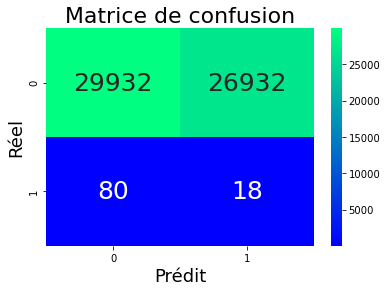

In [42]:
def conf_matrix(y_test,y_pred):
    #print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}\n")
    sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')
    plt.title('Matrice de confusion', y=1.1, fontsize = 22)
    plt.xlabel('Prédit',fontsize = 18)
    plt.ylabel('Réel',fontsize = 18)
    plt.show()
conf_matrix(y_test,y_pred)

In [46]:
def clf_report(y_test,y_pred):
    clf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
    print(f"Rapport de classification :\n")
    display(clf_report)
clf_report(y_test,y_pred)

Rapport de classification :



,0,1,accuracy,macro avg,weighted avg
precision,0.997334,0.000668,0.525789,0.499001,0.995620
recall,0.526379,0.183673,0.525789,0.355026,0.525789
f1-score,0.689074,0.001331,0.525789,0.345203,0.687891
support,56864.000000,98.000000,0.525789,56962.000000,56962.000000


In [119]:
metric(y_test,y_pred)

0.23254713412849629

In [ ]:
#Rundom undersampling
from imblearn.over_sampling import RandomUnderSampler
random_under_sampler =  RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = random_under_sampler.fit_resample(X_train, y_train)

In [38]:
display(X_train_rus.shape)
display(y_train_rus.shape)

(788, 30)

(788,)

In [39]:
#  le nombre de transaction frauduleuse :1 et non frauduleuse : 0 
collections.Counter(y_train_rus)

Counter({0: 394, 1: 394})

In [82]:
#rundom undersampling
kmeans_rus = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans_rus.fit(X_train_rus)
y_pred_rus=kmeans_rus.predict(X_test)

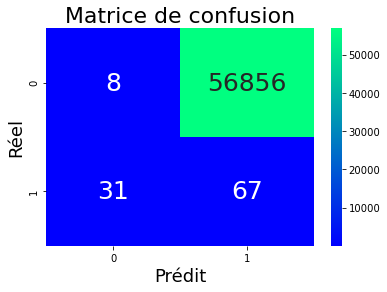

In [83]:
conf_matrix(y_test,y_pred_rus)

In [84]:
clf_report(y_test,y_pred_rus)

Rapport de classification :



,0,1,accuracy,macro avg,weighted avg
precision,0.205128,0.001177,0.001317,0.103153,0.204777
recall,0.000141,0.683673,0.001317,0.341907,0.001317
f1-score,0.000281,0.002350,0.001317,0.001316,0.000285
support,56864.000000,98.000000,0.001317,56962.000000,56962.000000


In [108]:
metric(y_test,y_pred_rus)

score : 0.48871438306321136 soit 48.87%


In [56]:
#Rundom oversampling
from imblearn.over_sampling import RandomOverSampler
random_over_sampler =  RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = random_over_sampler.fit_resample(X_train, y_train)

In [57]:
display(X_train_ros.shape)
display(y_train_ros.shape)

(454902, 30)

(454902,)

In [58]:
#  le nombre de transaction frauduleuse :1 et non frauduleuse : 0 
collections.Counter(y_train_ros)

Counter({0: 227451, 1: 227451})

In [78]:
#rundom oversampling
kmeans_ros = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans_ros.fit(X_train_ros)
y_pred_ros=kmeans_ros.predict(X_test)


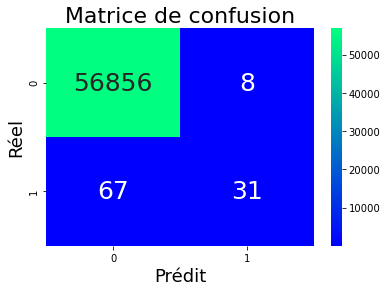

In [79]:
conf_matrix(y_test,y_pred_ros)

In [80]:
clf_report(y_test,y_pred_ros)

Rapport de classification :



,0,1,accuracy,macro avg,weighted avg
precision,0.998823,0.794872,0.998683,0.896847,0.998472
recall,0.999859,0.316327,0.998683,0.658093,0.998683
f1-score,0.999341,0.452555,0.998683,0.725948,0.998400
support,56864.000000,98.000000,0.998683,56962.000000,56962.000000


In [110]:
metric(y_test,y_pred_ros)

score : 0.5112856169367886 soit 51.13%


In [63]:
#smote
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [74]:
kmeans_smote = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans_smote.fit(X_train_smote)
y_pred_smote=kmeans_smote.predict(X_test)

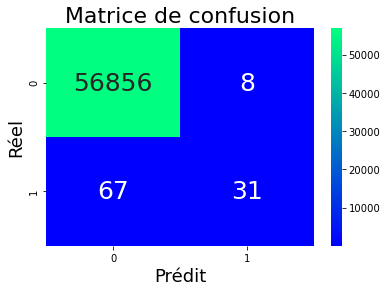

In [75]:
conf_matrix(y_test,y_pred_smote)

In [76]:
clf_report(y_test,y_pred)

Rapport de classification :



,0,1,accuracy,macro avg,weighted avg
precision,0.997334,0.000668,0.525789,0.499001,0.995620
recall,0.526379,0.183673,0.525789,0.355026,0.525789
f1-score,0.689074,0.001331,0.525789,0.345203,0.687891
support,56864.000000,98.000000,0.525789,56962.000000,56962.000000


In [111]:
metric(y_test,y_pred_smote)

score : 0.5112856169367886 soit 51.13%


In [68]:
#ADASYN
from imblearn.over_sampling import ADASYN 
ada = ADASYN(random_state=42)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

In [70]:
kmeans_ada = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans_ada.fit(X_train_ada)
y_pred_ada=kmeans_ada.predict(X_test)

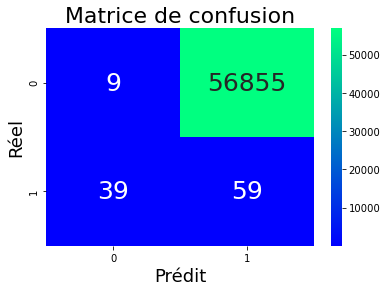

In [71]:
conf_matrix(y_test,y_pred_ada)

In [72]:
clf_report(y_test,y_pred_ada)

Rapport de classification :



,0,1,accuracy,macro avg,weighted avg
precision,0.187500,0.001037,0.001194,0.094268,0.187179
recall,0.000158,0.602041,0.001194,0.301100,0.001194
f1-score,0.000316,0.002070,0.001194,0.001193,0.000319
support,56864.000000,98.000000,0.001194,56962.000000,56962.000000


In [112]:
metric(y_test,y_pred_ada)

score : 0.4303702340356207 soit 43.04%


In [86]:
#BorderlineSMOTE
from imblearn.over_sampling import BorderlineSMOTE
bls = BorderlineSMOTE(random_state=42)
X_train_bls, y_train_bls = bls.fit_resample(X_train, y_train)

In [87]:
kmeans_bls = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans_bls.fit(X_train_bls)
y_pred_bls=kmeans_bls.predict(X_test)

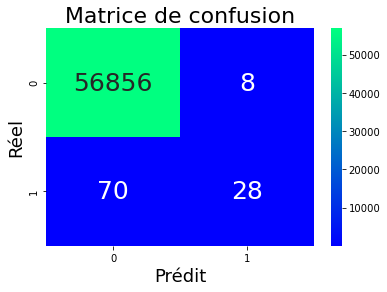

In [88]:
conf_matrix(y_test,y_pred_bls)

In [89]:
clf_report(y_test,y_pred_bls)

Rapport de classification :



,0,1,accuracy,macro avg,weighted avg
precision,0.998770,0.777778,0.998631,0.888274,0.998390
recall,0.999859,0.285714,0.998631,0.642787,0.998631
f1-score,0.999315,0.417910,0.998631,0.708612,0.998314
support,56864.000000,98.000000,0.998631,56962.000000,56962.000000


In [90]:
metric(y_test,y_pred_bls)

score : 0.3875594829062554 soit 38.76%


In [46]:
scores = cross_val_score(kmeans, X_train, y_train, scoring = 'f1', cv=5)
trace = go.Table(
    header=dict(values=['<b>F1 score mean<b>', '<b>F1 score std<b>'],
                line = dict(color='#7D7F80'),
                fill = dict(color='#a1c3d1'),
                align = ['center'],
                font = dict(size = 15)),
    cells=dict(values=[np.round(scores.mean(),6),
                       np.round(scores.std(),6)],
               line = dict(color='#7D7F80'),
               fill = dict(color='#EDFAFF'),
               align = ['center'], font = dict(size = 15)))

layout = dict(width=800, height=500, title = 'Cross validation - 5 folds [F1 score]', font = dict(size = 15))
fig = dict(data=[trace], layout=layout)
py.iplot(fig, filename = 'styled_table')